# Selection de variables : 

Librairies :

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
SEED=42

In [3]:
df=pd.read_csv('cleaned_final.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# 1. Ridge 

First of all we load our cleaned data. As our project is about binary classification, in order to apply the technique of ridge regressio learned in the course of Sebastien Laurent, we will use the technique explained by Ewen Gallic. This technique is called latent vaiable. More details are explaiend in the report.

Now we split our data set into training and testing and extract the target variable from our dataset.

In [4]:
df1 = df.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1.drop('Opiods Used', axis=1),
    df1['Opiods Used'],test_size=0.2, stratify=df1['Opiods Used'],
    shuffle=True,
    random_state=SEED)

Now we scale our features even if they include dummies

In [5]:
Y=y_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
x = X_train_std
X_test_std = scaler.transform(X_test)
x_t=X_test_std

In [6]:
import statsmodels.api as sm 
x=sm.add_constant(x)

x_t=np.c_[  np.ones(len(x_t)),x_t] 
I=np.identity(np.array(x.shape)[1])
lam=10**np.linspace(9,-1,1000)*0.5
beta_ridge=np.zeros((np.array(x.shape)[1],len(lam)))

y_pred=np.zeros((len(X_test_std),len(lam)))
y_pred_train=np.zeros((len(X_train_std),len(lam)))
pred=np.zeros((len(X_test_std),len(lam)))
pred_train=np.zeros((len(X_train_std),len(lam)))

In [7]:
miscl=np.zeros(len(lam))
miscl_train=np.zeros(len(lam))
from sklearn.metrics import accuracy_score
for i in range(len(lam)):
    beta_ridge[:,i]=np.dot(np.dot(inv(np.dot(x.T, x) + lam[i] * I), x.T), Y)
   #beta_ridge[:,i]=inv(x.transpose() @ x + lam[i] * I ) @ x.transpose() @ Y
   #_, S, _ =np.linalg.svd(x)
   #df=np.sum(np.square(S) / (np.square(S) + lam[i]))
    pred[:,i]=x_t@beta_ridge[:,i]
    pred_train[:,i]=x@beta_ridge[:,i]

Here we assign the classes depending on the threshold determined before.We do it based on lambda=0.05.

In [8]:
t=np.linspace(start=np.min(pred[:,999]),stop=np.max(pred[:,999]),num=1000)
missscl=np.zeros(len(t))
y_pr=np.zeros((len(X_test_std),len(t)))
for s in range(len(t)):
    for k in range(len(X_test_std)):
        if pred[k,999]>=t[s]:
            y_pr[k,s]=1
        else:
            y_pr[k,s]=0
    missscl[s]=1-accuracy_score(y_test, y_pr[:,s])


idx = np.argmin(missscl)
    
best_t=t[idx]
best_t

0.3575014806832454

In [9]:
for i in range(len(lam)):

    for k in range(len(X_test)):
        if pred[k,i]>best_t:
            y_pred[k,i]=1
        else:
            y_pred[k,i]=0
        
    for f in range(len(X_train)):
        if pred_train[f,i]>best_t:
            y_pred_train[f,i]=1
        else:
            y_pred_train[f,i]=0

    
    miscl[i]=1-accuracy_score(y_test, y_pred[:,i])
    miscl_train[i]=1-accuracy_score(y_train, y_pred_train[:,i])

After this we plot our coefficients.

Text(0.5, 1.0, 'Ridge regression coefficients')

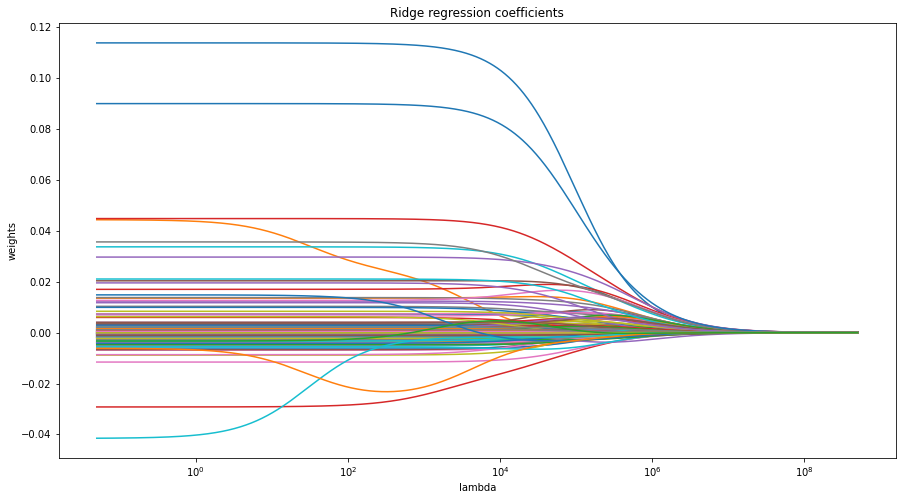

In [10]:
plt.figure(1,[15,8])
ax = plt.gca()
ax.plot(lam,beta_ridge.transpose() )
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge regression coefficients')

Text(0.5, 1.0, 'Misclassification error rate')

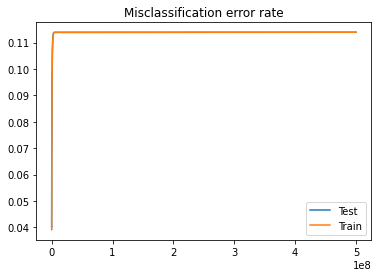

In [11]:
plt.plot(lam,miscl,label='Test')
plt.plot(lam,miscl_train,label='Train')
plt.legend(loc="lower right")
plt.title('Misclassification error rate')

Text(0.5, 1.0, 'Misclassification error rate depending on the log of lambda')

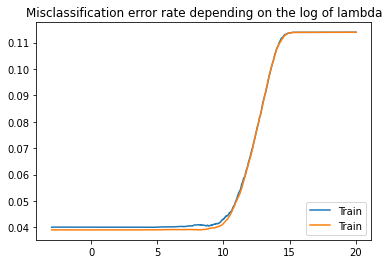

In [12]:
plt.plot(np.log(lam),miscl,label='Train')
plt.plot(np.log(lam),miscl_train,label='Train')
plt.legend(loc="lower right")
plt.title('Misclassification error rate depending on the log of lambda')

In [13]:
miscl

array([0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391041,
       0.11391041, 0.11391041, 0.11391041, 0.11391041, 0.11391

In [14]:
miscl_train

array([0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390477,
       0.11390477, 0.11390477, 0.11390477, 0.11390477, 0.11390

In [15]:
beta_ridge[:,999]

array([ 1.13904715e-01,  4.43781371e-02,  2.60852383e-03, -2.92089385e-02,
        3.36544994e-03,  1.54017643e-03,  4.06674629e-03, -1.33113648e-03,
        3.91283380e-03, -3.75788599e-03,  7.21907768e-03,  3.30540747e-03,
       -3.71838361e-03, -1.94367644e-03,  2.38587000e-03,  2.55361878e-03,
       -6.87073420e-03, -2.30339572e-03,  7.44035909e-03,  3.37308416e-02,
        7.26363930e-03,  1.35430285e-02, -1.69350142e-03, -8.82491236e-04,
        1.24029372e-02, -3.48123373e-03,  7.32327125e-03,  1.37855452e-02,
        3.16841649e-03,  1.54475859e-03, -4.43620445e-04, -1.62765019e-03,
        6.46324757e-04,  3.56829313e-03, -2.36051349e-03,  3.07051223e-03,
       -3.74615058e-03,  1.03432830e-02, -4.58112996e-03, -3.93200521e-04,
        9.94222885e-03, -2.91911668e-03,  1.32244842e-03,  5.97785835e-03,
       -2.15746260e-03, -6.70089464e-03,  6.49100560e-03,  4.02363381e-03,
       -4.33159677e-03, -5.30566955e-03, -6.07026209e-03, -5.82514204e-04,
       -3.63752120e-03,  

As our dataset is imbalanced, accurcy maybe not representative for the perforamce of our model, this is why we redo this technique this time using the maximum of F1-score. 

In [44]:
from sklearn.metrics import roc_auc_score
t=np.linspace(start=np.min(pred[:,999]),stop=np.max(pred[:,999]),num=1000)

y_pr=np.zeros((len(X_test_std),len(t)))
auc_t=np.zeros(len(lam))#it will be our mif1_score testing sample
auc_train=np.zeros(len(lam))#for training sample
for s in range(len(t)):
    for k in range(len(X_test_std)):
        if pred[k,999]>=t[s]:
            y_pr[k,s]=1
        else:
            y_pr[k,s]=0
    auc_t[s]=roc_auc_score(y_test, y_pr[:,s])
idx = np.argmax(auc_t)
    
best_t=t[idx]
best_t



0.23006658947099123

In [45]:
y_pred=np.zeros((len(X_test_std),len(lam)))
y_pred_train=np.zeros((len(X_train_std),len(lam)))
auc=np.zeros(len(lam))#it will be our f1_score testing sample
auc_train=np.zeros(len(lam))#for training sample
for i in range(len(lam)):


    for k in range(len(X_test_std)):
        if pred[k,i]>best_t:
            y_pred[k,i]=1
        else:
            y_pred[k,i]=0
        
    for f in range(len(X_train_std)):
        if pred_train[f,i]>best_t:
            y_pred_train[f,i]=1
        else:
            y_pred_train[f,i]=0

    
    auc[i]=roc_auc_score(y_test, y_pred[:,i])
    auc_train[i]=roc_auc_score(y_train, y_pred_train[:,i])

Text(0.5, 1.0, 'AUC score')

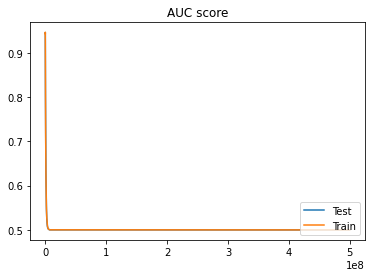

In [49]:
plt.plot(lam,auc,label='Test')
plt.plot(lam,auc_train,label='Train')
plt.legend(loc="lower right")
plt.title('AUC score')

Zooming in in order to see the curves closer

Text(0.5, 1.0, 'AUC Score')

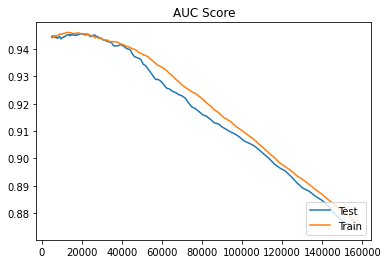

In [54]:
plt.plot(lam[350:500],auc[350:500],label='Test')
plt.plot(lam[350:500],auc_train[350:500],label='Train')
plt.legend(loc="lower right")
plt.title('AUC Score')

Text(0.5, 1.0, 'AUC-score depending on the log of lambda')

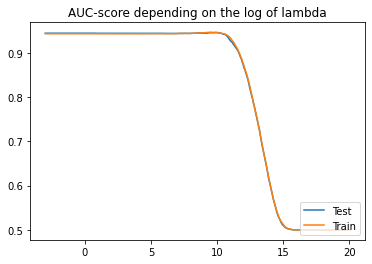

In [51]:
plt.plot(np.log(lam),auc,label='Test')
plt.plot(np.log(lam),auc_train,label='Train')
plt.legend(loc="lower right")
plt.title('AUC-score depending on the log of lambda')

# 2. Lasso with Logistic regression

New variables in the dataset : wage and age 

In [56]:
df2 = df.copy()
df2['Claimant Age squared'] = np.round(df2['Claimant Age']**2,0)
df2['Weekly Wage squared'] = np.round(df2['Weekly Wage']**2,2 )
df2['Claimant Age cubic'] = np.round(df2['Claimant Age']**3,0)
df2['Weekly Wage cubic'] = np.round(df2['Weekly Wage']**3,2)

Undersampling at random our dataset in order to get balanced and smaller dataset :
 - 1 : with RandomUnderSampler 

In [57]:
from imblearn.under_sampling import RandomUnderSampler
SEED=42

ros = RandomUnderSampler(random_state=SEED,sampling_strategy='majority')#to reduce the majority class
X_res,y_res=ros.fit_resample(df2.drop('Opiods Used', axis=1),df2['Opiods Used'])
X_res['Opiods Used']=y_res
df2=X_res
coefs=[]

lambdas= 10**np.linspace(2,-3,500)*0.5

X_train, X_test, y_train, y_test=train_test_split(df2.drop('Opiods Used', axis=1),
    df2['Opiods Used'],test_size=0.2, stratify=df2['Opiods Used'],
    shuffle=True,
    random_state=SEED)

Scaling the features 

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Computing the coefficienta after applying lasso penalty with different 'C' coefficients

In [59]:
coefs=[]
SEED=42
lambdas= 10**np.linspace(1,-5,500)*0.5

for l in lambdas:
    log_clf = LogisticRegression(C = l, penalty= 'l1', solver= 'liblinear',random_state=SEED)
    log_clf.fit(X_train_std, y_train)
    coefs.append(log_clf.coef_)
coef=np.array(coefs)
coef=np.squeeze(coef)

Text(0.5, 1.0, 'Lasso')

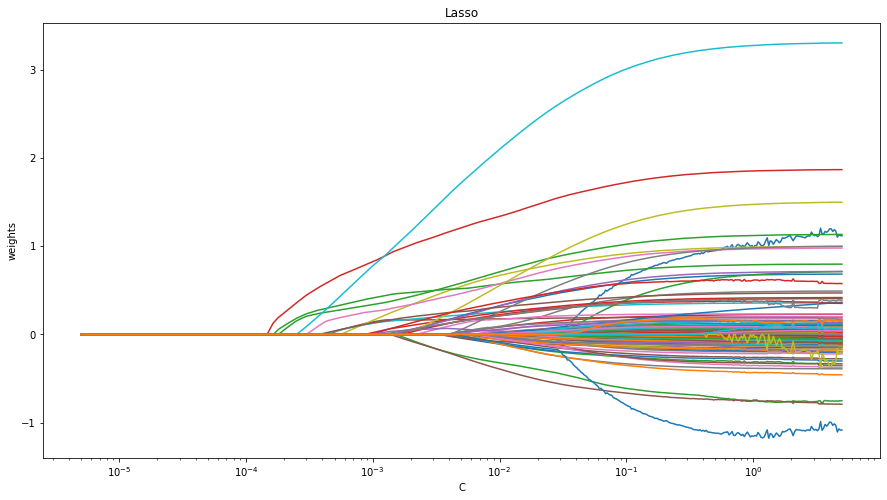

In [60]:
plt.figure(1,[15,8])
ax = plt.gca()
ax.plot(lambdas, coef)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('C')
plt.ylabel('weights')
plt.title('Lasso')

In [61]:
lam=10**np.linspace(0,-4,100)*0.5

In [63]:
grid={"C":lam}
logreg=LogisticRegression(solver='liblinear',max_iter=300,penalty='l1')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_std,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy:",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.37823166377731443}
accuracy: 0.9534788540245567


Displaying the testing accuracy

In [68]:
accuracy_test=accuracy_score(y_test, logreg_cv.predict(X_test_std))
accuracy_test

0.9528919607129865

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logreg_cv.predict(X_test_std))


0.9528919607129867

In [72]:
matthews_corrcoef(y_test, logreg_cv.predict(X_test_std))

0.905783981356097

In [75]:
y_pred=logreg_cv.predict(X_test_std)

Confusion matrix on the test data

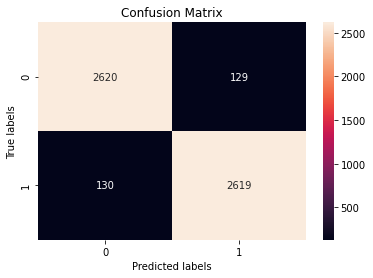

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

For the last we were inspired by the code form this website:
https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

In [77]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=0.37823166377731443,solver='liblinear',max_iter=300,penalty='l1'))
sel_.fit(X_train_std, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.37823166377731443,
                                             max_iter=300, penalty='l1',
                                             solver='liblinear'))

Visualizing the features that were left after lasso regularization

In [78]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,

Displaying the number of removed and the number of total features

In [79]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 212
selected features: 186
features with coefficients shrank to zero: 26


Displaying the names of removed features

In [80]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['HCPCS X Codes', 'Benefits State_LA', 'Benefits State_KS',
       'Benefits State_MT', 'Benefits State_WY', 'Benefits State_JA',
       'Benefits State_ND', 'SIC Group_services', 'SIC Group_public_admi',
       'Disability Status_PPD', 'Disability Status_PTD',
       'Claimant Marital Status_U', 'Employment Status Flag_L',
       'Employment Status Flag_C', 'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Dislocation',
       'NCCI BINatureOfLossDescription_No Physical Injury',
       'Accident Type Group num_9', 'Accident Type Group num_10',
       'Accident Type Group num_12', 'Accident Type Group num_14',
       'Accident Type Group num_16', 'Industry ID_13', 'Industry ID_7',
       'Industry ID_1', 'Claimant Age squared'],
      dtype='object')

# Undersampling : train set
- 2 : with NearMiss 

In [81]:
df2a = df.copy()
df2a['Claimant Age squared'] = np.round(df2a['Claimant Age']**2,0)
df2a['Weekly Wage squared'] = np.round(df2a['Weekly Wage']**2,2 )
df2a['Claimant Age cubic'] = np.round(df2a['Claimant Age']**3,0)
df2a['Weekly Wage cubic'] = np.round(df2a['Weekly Wage']**3,2)

In [82]:
from imblearn.under_sampling import NearMiss 

SEED = 42
X2_train, X2_test, y2_train, y2_test=train_test_split(df2a.drop('Opiods Used', axis=1),
    df2a['Opiods Used'],test_size=0.2, stratify=df2a['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X2_train, y2_train)

In [83]:
#Standarize train et test set 
scaler = StandardScaler()
scaler.fit(X_train_miss)
X_train_std_miss = scaler.transform(X_train_miss)
X_test_std= scaler.transform(X2_test)

In [84]:
coefs=[]
SEED=42
lambdas= 10**np.linspace(1,-5,500)*0.5

for l in lambdas:
    log_clf = LogisticRegression(C = l, penalty= 'l1', solver= 'liblinear',random_state=SEED)
    log_clf.fit(X_train_std_miss, y_train_miss)
    coefs.append(log_clf.coef_)
coef=np.array(coefs)
coef=np.squeeze(coef)

Text(0.5, 1.0, 'Lasso')

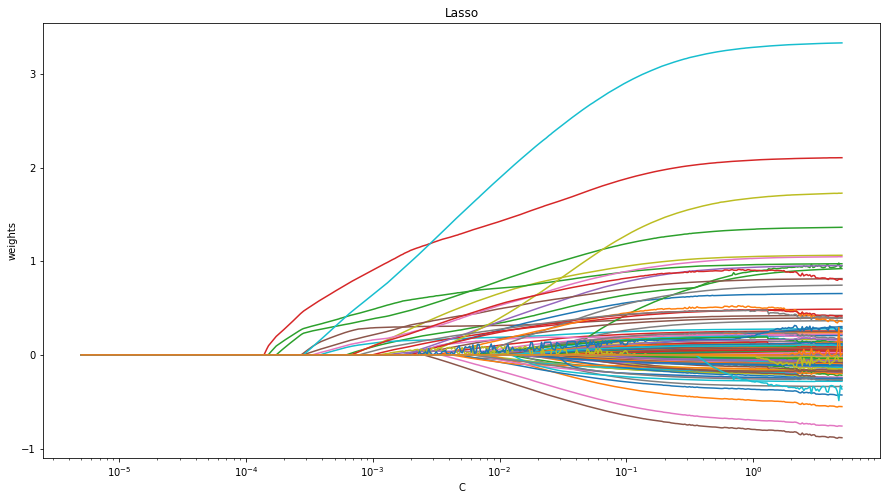

In [85]:
plt.figure(1,[15,8])
ax = plt.gca()
ax.plot(lambdas, coef)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('C')
plt.ylabel('weights')
plt.title('Lasso')

In [87]:
lam=10**np.linspace(0,-4,100)*0.5

In [88]:
lam

array([5.00000000e-01, 4.55581378e-01, 4.15108784e-01, 3.78231664e-01,
       3.44630605e-01, 3.14014572e-01, 2.86118383e-01, 2.60700414e-01,
       2.37540508e-01, 2.16438064e-01, 1.97210303e-01, 1.79690683e-01,
       1.63727458e-01, 1.49182362e-01, 1.35929412e-01, 1.23853818e-01,
       1.12850986e-01, 1.02825615e-01, 9.36908711e-02, 8.53676324e-02,
       7.77838072e-02, 7.08737081e-02, 6.45774833e-02, 5.88405976e-02,
       5.36133611e-02, 4.88504979e-02, 4.45107543e-02, 4.05565415e-02,
       3.69536102e-02, 3.36707533e-02, 3.06795364e-02, 2.79540509e-02,
       2.54706901e-02, 2.32079442e-02, 2.11462144e-02, 1.92676430e-02,
       1.75559587e-02, 1.59963357e-02, 1.45752653e-02, 1.32804389e-02,
       1.21006413e-02, 1.10256537e-02, 1.00461650e-02, 9.15369140e-03,
       8.34050269e-03, 7.59955541e-03, 6.92443186e-03, 6.30928442e-03,
       5.74878498e-03, 5.23807876e-03, 4.77274228e-03, 4.34874501e-03,
       3.96241449e-03, 3.61040451e-03, 3.28966612e-03, 2.99742125e-03,
      

In [94]:
grid={"C":lam}

logreg=LogisticRegression(solver='liblinear',max_iter=300,penalty='l1')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_std_miss, y_train_miss)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy:",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0936908711430192}
accuracy: 0.9698044565711686


In [95]:
y_pred=logreg_cv.predict(X_test_std)

Metrics on the training set

In [154]:
accuracy_score(y_train_miss, logreg_cv.predict(X_train_std_miss))

0.9730786721236926

In [151]:
roc_auc_score(y_train_miss, logreg_cv.predict(X_train_std_miss))

0.9730786721236925

In [153]:
matthews_corrcoef(y_train_miss, logreg_cv.predict(X_train_std_miss))

0.9462046987059354

Metrics on the testing set

In [96]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y2_test, y_pred)
accuracy_test #we cannot interpret for test set

0.9043633199353582

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y2_test, logreg_cv.predict(X_test_std))

0.9357317652632111

In [99]:
matthews_corrcoef(y2_test, logreg_cv.predict(X_test_std))

0.6868648887675992

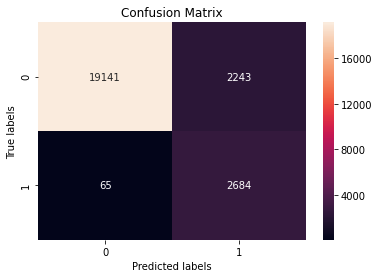

In [100]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y2_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [102]:
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(LogisticRegression(C=0.08536763237353452,solver='liblinear',max_iter=300,penalty='l1'))
sel_.fit(X_train_std_miss,y_train_miss)

SelectFromModel(estimator=LogisticRegression(C=0.08536763237353452,
                                             max_iter=300, penalty='l1',
                                             solver='liblinear'))

In [103]:
sel_.get_support()

array([False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False,

In [104]:
selected_feat = X_train_miss.columns[(sel_.get_support())]
print('total features: {}'.format((X_train_miss.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 212
selected features: 140
features with coefficients shrank to zero: 72


In [105]:
removed_feats = X_train_miss.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', '

# 3. PCA

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_pca= pca.fit_transform(X_train_std_miss)
X_test_pca = pca.transform(X_test_std)

In [107]:
explained_variance = pca.explained_variance_ratio_

Explained variance ratio shows how much information (variance) is attributed to each of the principal components 

In [108]:
explained_variance

array([0.04957484, 0.02013537, 0.01862534, 0.0150975 , 0.01419746,
       0.01169578, 0.01149624, 0.01106733, 0.01035649, 0.01003587,
       0.00948669, 0.00925771, 0.00896267, 0.00885384, 0.0086152 ,
       0.00819604, 0.00810057, 0.0079846 , 0.00784476, 0.00762348])

In [109]:
cum=pca.explained_variance_ratio_.cumsum()
cum

array([0.04957484, 0.06971021, 0.08833556, 0.10343306, 0.11763052,
       0.1293263 , 0.14082254, 0.15188987, 0.16224636, 0.17228223,
       0.18176891, 0.19102663, 0.1999893 , 0.20884314, 0.21745835,
       0.22565439, 0.23375496, 0.24173955, 0.24958431, 0.25720779])

In [110]:
labels=[i for i in range(1,21)]

Text(0.5, 0, 'Principal component')

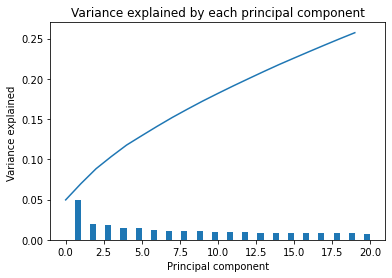

In [111]:
plt.bar(labels,list(map(float, explained_variance)),align='edge', width=-0.4)
plt.plot(cum)
plt.title('Variance explained by each principal component')
plt.ylabel('Variance explained ')
plt.xlabel('Principal component')

In [157]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf.fit(X_train_pca, y_train_miss)

# Predicting the Test set results
y_pred = clf.predict(X_test_pca)

Metrics on the training set 

In [158]:
accuracy_score(y_train_miss,clf.predict(X_train_pca))

0.9999545247839927

In [159]:
roc_auc_score(y_train_miss,clf.predict(X_train_pca))

0.9999545247839927

In [160]:
matthews_corrcoef(y_train_miss,clf.predict(X_train_pca))

0.9999090537035998

Metrics on the testing set

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test,y_pred)

0.8073177806323292

In [114]:
roc_auc_score(y2_test, y_pred)

0.8709855483278142

In [115]:
matthews_corrcoef(y2_test,y_pred)

0.5163947473212874

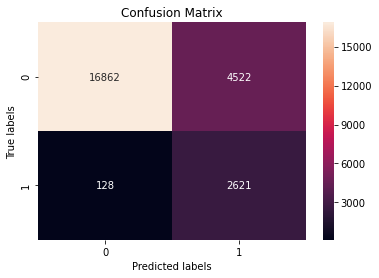

In [161]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y2_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [162]:
clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf.fit(X_train_std_miss, y_train_miss)

# Predicting the Test set results
y_pred_no_pca = clf.predict(X_test_std)

Metrics on the train set

In [163]:
accuracy_score(y_train_miss,clf.predict(X_train_std_miss))

0.9999545247839927

In [164]:
roc_auc_score(y_train_miss,clf.predict(X_train_std_miss))

0.9999545247839927

In [165]:
matthews_corrcoef(y_train_miss,clf.predict(X_train_std_miss))

0.9999090537035998

Metrics on the test set

In [118]:
accuracy_score(y2_test,y_pred_no_pca)

0.8470558985621348

In [119]:
roc_auc_score(y2_test, y_pred_no_pca)

0.9041870155280083

In [121]:
matthews_corrcoef(y2_test,y_pred_no_pca)

0.5841402377646616

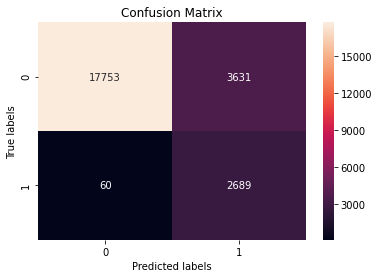

In [122]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y2_test,y_pred_no_pca)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

# 4. Elastic Net

In [170]:
elastic_net=LogisticRegression(C=0.0936908711430192,solver='saga',max_iter=1000,penalty='elasticnet', l1_ratio=0.5,random_state=SEED)

In [171]:
elastic_net.fit(X_train_std_miss,y_train_miss)

LogisticRegression(C=0.0936908711430192, l1_ratio=0.5, max_iter=1000,
                   penalty='elasticnet', random_state=42, solver='saga')

In [172]:
y_pred_elastic=elastic_net.predict(X_test_std)

Metrics on the training set

In [173]:
accuracy_score(y_train_miss,elastic_net.predict(X_train_std_miss))

0.973306048203729

In [174]:
roc_auc_score(y_train_miss, elastic_net.predict(X_train_std_miss))

0.9733060482037289

In [175]:
matthews_corrcoef(y_train_miss,elastic_net.predict(X_train_std_miss))

0.9466638788941413

Metrics on the test set

In [176]:
accuracy_score(y2_test,y_pred_elastic)

0.9022085940413541

In [177]:
roc_auc_score(y2_test, y_pred_elastic)

0.9346744052899826

In [178]:
matthews_corrcoef(y2_test,y_pred_elastic)

0.6824338643808161

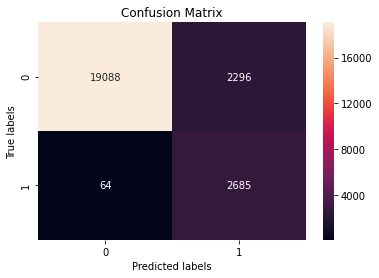

In [179]:

cm=confusion_matrix(y2_test,y_pred_elastic)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [180]:
sel_ = SelectFromModel(elastic_net)
sel_.fit(X_train_std_miss,y_train_miss)

SelectFromModel(estimator=LogisticRegression(C=0.0936908711430192, l1_ratio=0.5,
                                             max_iter=1000,
                                             penalty='elasticnet',
                                             random_state=42, solver='saga'))

In [183]:
sel_.get_support()

array([False,  True,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [181]:
selected_feat = X_train_miss.columns[(sel_.get_support())]
print('total features: {}'.format((X_train_miss.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 212
selected features: 49
features with coefficients shrank to zero: 46


In [182]:
removed_feats = X_train_miss.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Claimant Age', 'HCPCS Q Codes', 'HCPCS X Codes', 'HCPCS Y Codes',
       'ICD Group 1', 'ICD Group 3', 'ICD Group 7', 'ICD Group 14',
       'ICD Group 20', 'Benefits State_TX', 'Benefits State_PA',
       'Benefits State_KS', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_WY', 'Benefits State_JA',
       'Benefits State_ND', 'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_F',
       'Claimant Marital Status_U', 'Employment Status Flag_L',
       'Employment Status Flag_A', 'Employment Status Flag_R',
       'Employment Status Flag_B', 'Employment Status Flag_C',
       'Employment Status Flag_D', 'Accident Type Group num_1',
       'Accident Type Group num_4', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'I

In [185]:
selected_feat

Index(['Number Dependents', 'Weekly Wage', 'Percent Impairment',
       'Surgery Flag', 'Orthopedic Surgery Payment Flag',
       'Optometrist Payment Flag', 'HCPCS D Codes', 'HCPCS E Codes',
       'HCPCS G Codes', 'HCPCS I Codes', 'HCPCS J Codes', 'HCPCS L Codes',
       'HCPCS R Codes', 'HCPCS W Codes', 'ICD Group 6', 'ICD Group 11',
       'ICD Group 12', 'ICD Group 13', 'ICD Group 18',
       'CPT Category - Eval_Mgmt', 'CPT Category - Medicine',
       'CPT Category - Path_Lab', 'CPT Category - Radiology',
       'CPT Category - Surgery', 'NDC Class - Benzo',
       'NDC Class - Misc (Zolpidem)', 'NDC Class - Muscle Relaxants',
       'Benefits State_CA', 'Benefits State_FL', 'Benefits State_NY',
       'Benefits State_CT', 'Benefits State_NJ', 'Benefits State_WI',
       'Benefits State_MN', 'Benefits State_MA', 'Benefits State_GA',
       'Benefits State_NC', 'Benefits State_CO', 'Benefits State_OR',
       'Benefits State_WA', 'NCCI BINatureOfLossDescription_Other',
       'NC